In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('train.csv')
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [5]:
data.shape

(800, 22)

In [6]:
data['age'] = data['age'].astype(int)

In [7]:
data['age'].head(2)

0    38
1    47
Name: age, dtype: int32

In [14]:
for col in data.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, data[col].unique())
        print('-'*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [13]:
for col in data.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, data[col].value_counts())
        print('-'*50)

A1_Score A1_Score
1    448
0    352
Name: count, dtype: int64
--------------------------------------------------
A2_Score A2_Score
1    424
0    376
Name: count, dtype: int64
--------------------------------------------------
A3_Score A3_Score
0    440
1    360
Name: count, dtype: int64
--------------------------------------------------
A4_Score A4_Score
0    468
1    332
Name: count, dtype: int64
--------------------------------------------------
A5_Score A5_Score
0    484
1    316
Name: count, dtype: int64
--------------------------------------------------
A6_Score A6_Score
0    557
1    243
Name: count, dtype: int64
--------------------------------------------------
A7_Score A7_Score
0    482
1    318
Name: count, dtype: int64
--------------------------------------------------
A8_Score A8_Score
1    407
0    393
Name: count, dtype: int64
--------------------------------------------------
A9_Score A9_Score
0    404
1    396
Name: count, dtype: int64
----------------------------------

In [16]:
data  = data.drop(columns=['ID', 'age_desc'], axis=1)

In [17]:
data.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [18]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [20]:
data['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [21]:
##define the mapping mapping dictionary for country names
mapping ={
     'Viet Nam':'Vietnam',
     'AmericanSamoa':"United States",
     'Hong Kong':'China',
}

#replae value in coutry column 
data['contry_of_res'] = data['contry_of_res'].replace(mapping)

In [23]:
data['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [25]:
data['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [27]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [28]:
sns.set_theme(style="darkgrid")

<Axes: xlabel='age', ylabel='Count'>

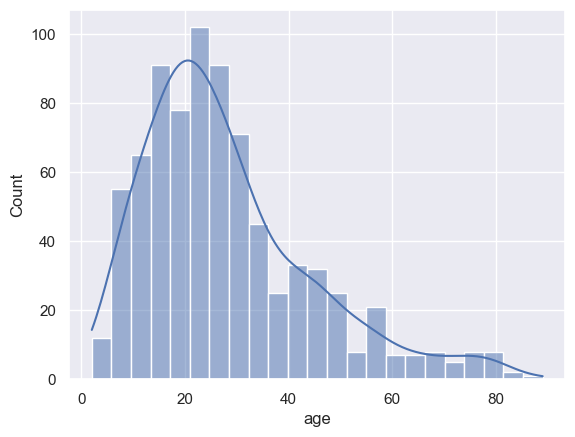

In [ ]:
sns.histplot(data['age'], kde=True)

<Axes: xlabel='result', ylabel='Count'>

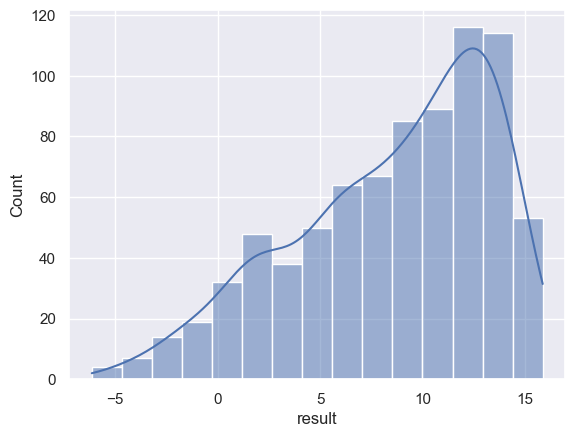

In [30]:
sns.histplot(data['result'], kde=True)

<Axes: ylabel='age'>

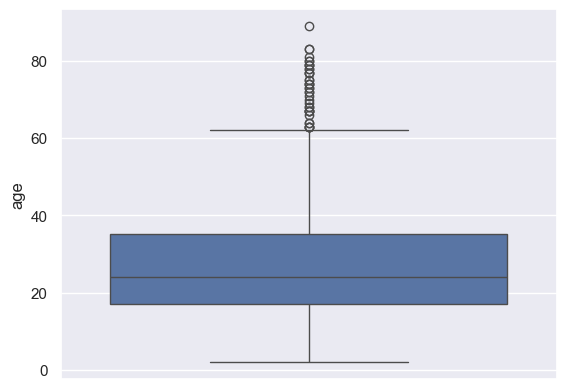

In [31]:
sns.boxplot(data['age'])

<Axes: ylabel='result'>

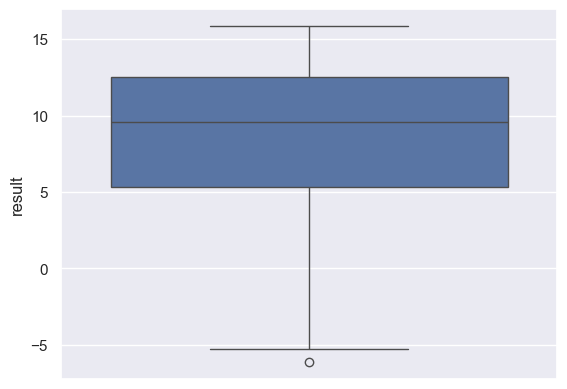

In [32]:
sns.boxplot(data['result'])

In [34]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [35]:
categorical_col =['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before'
       , 'relation']

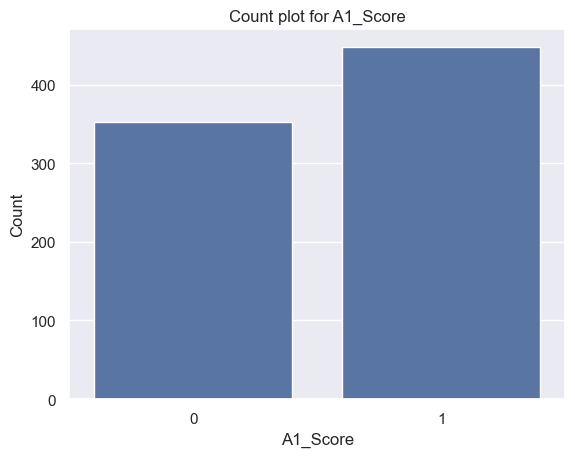

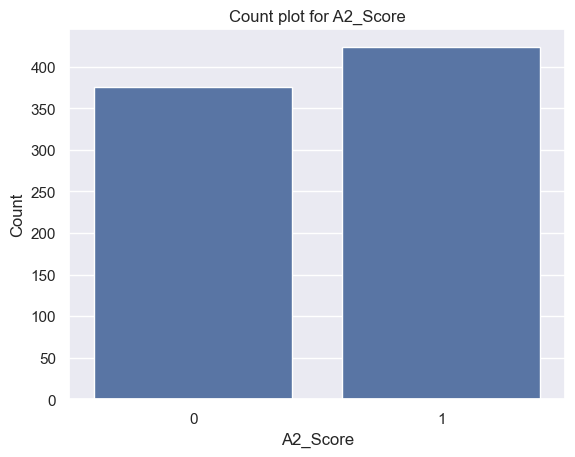

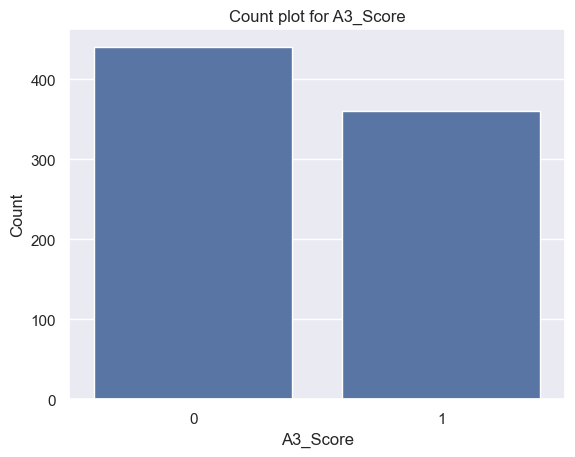

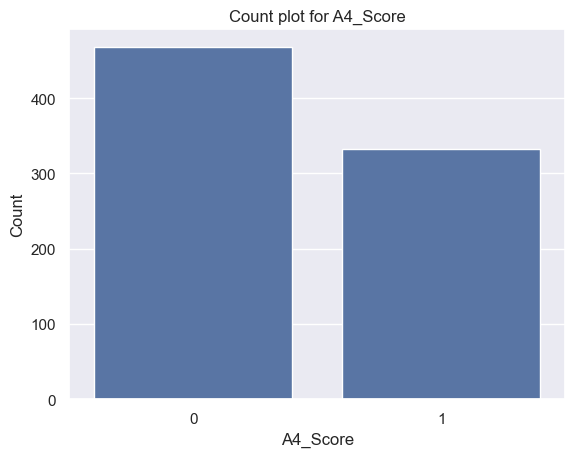

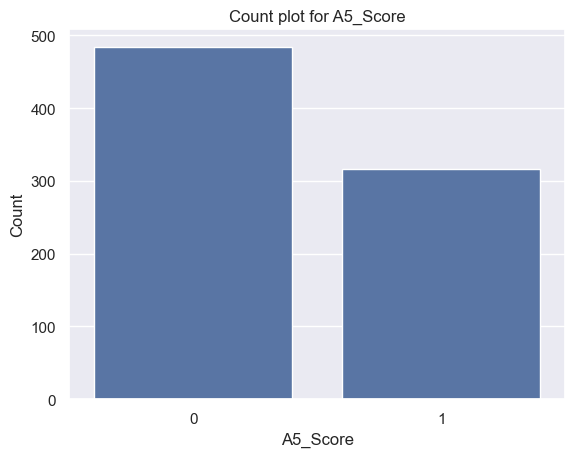

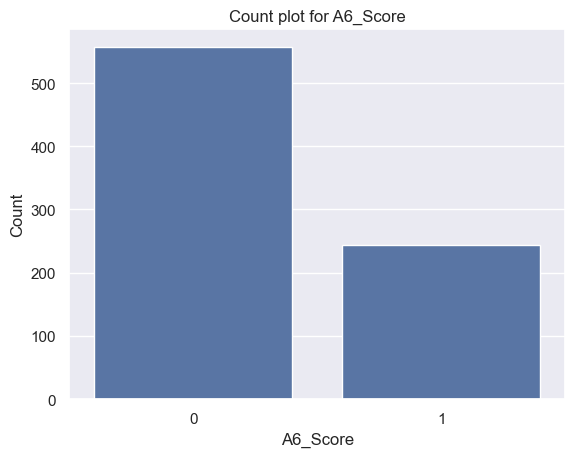

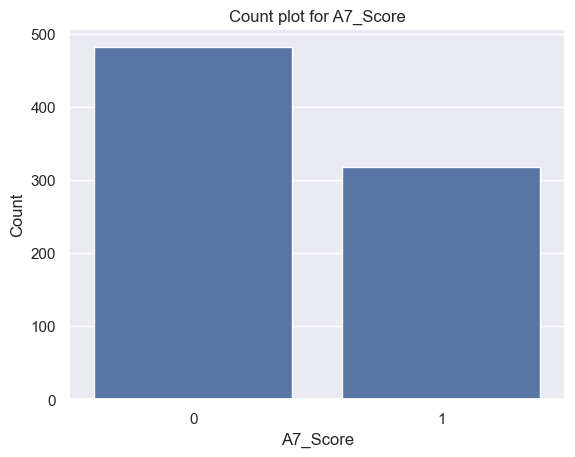

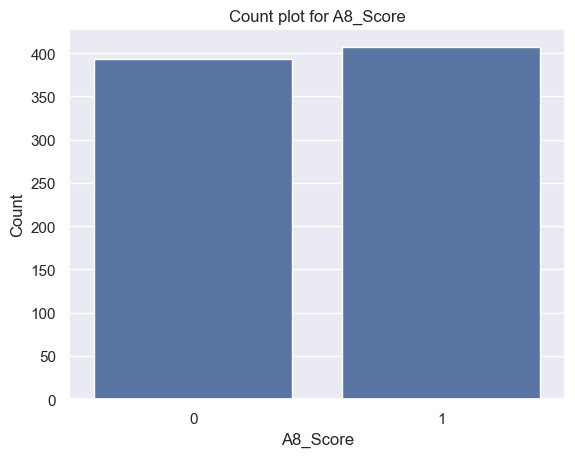

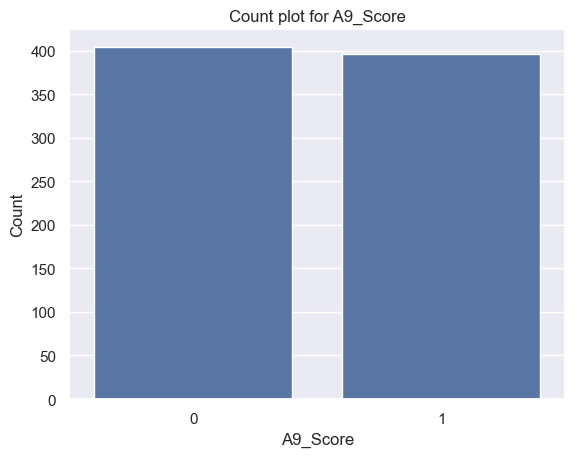

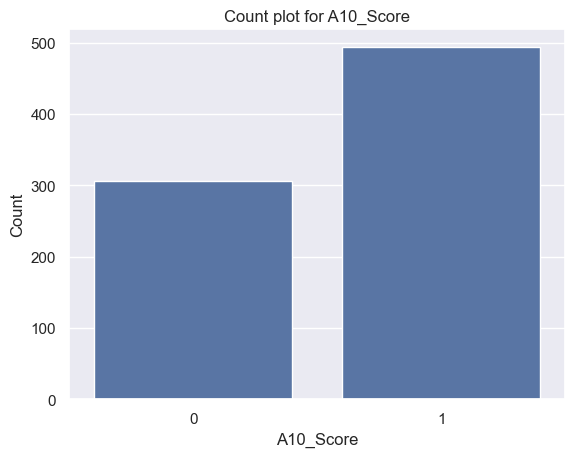

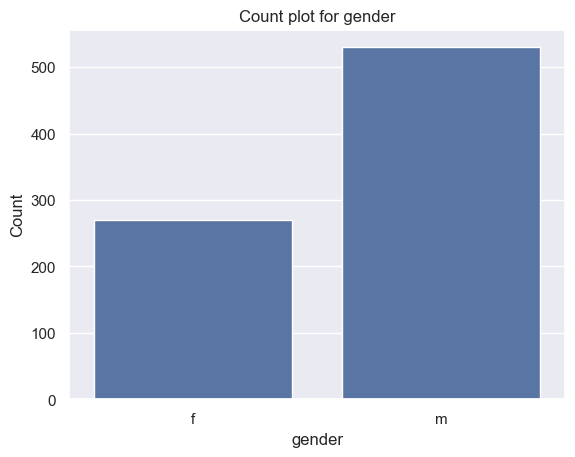

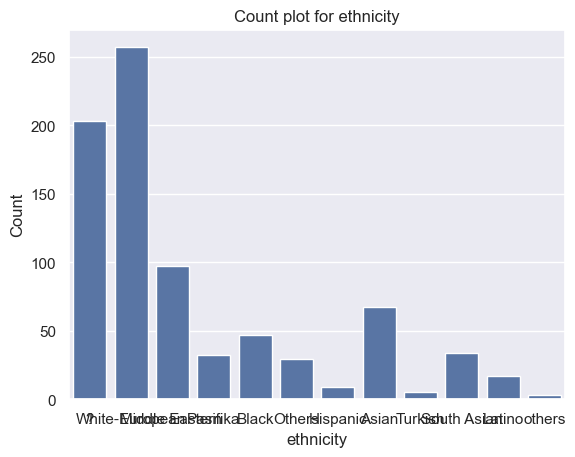

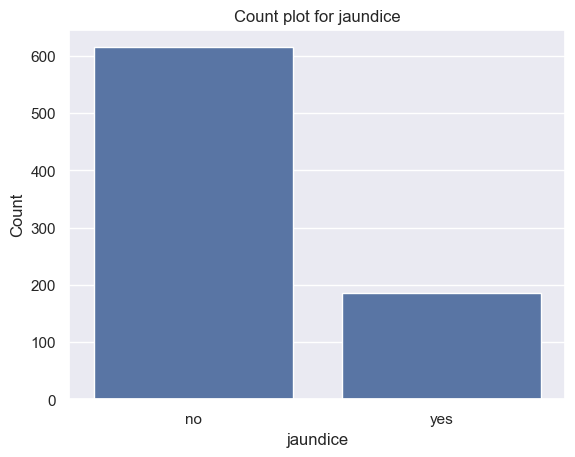

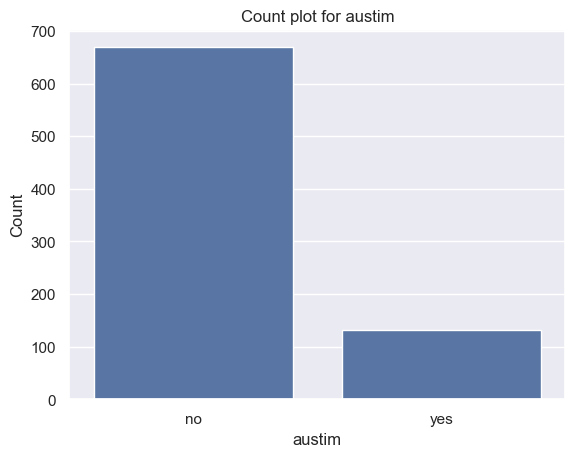

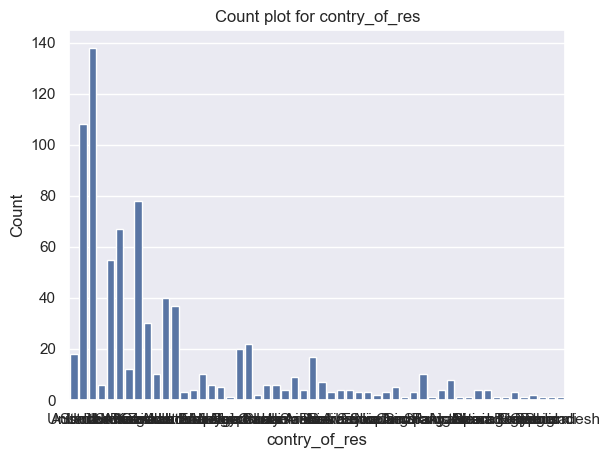

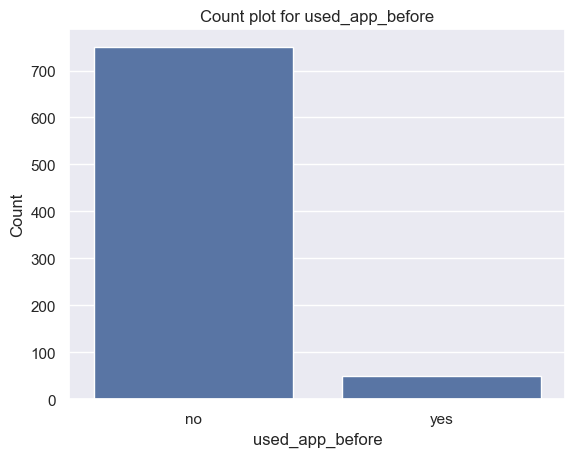

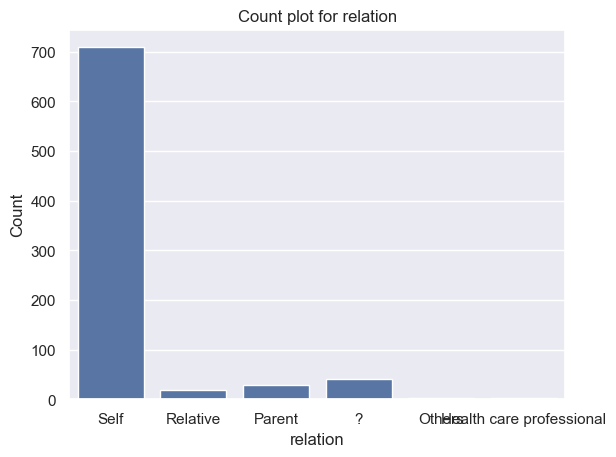

In [38]:
for col in categorical_col:
    sns.countplot(x=data[col])
    plt.title(f"Count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

<Axes: xlabel='Class/ASD', ylabel='count'>

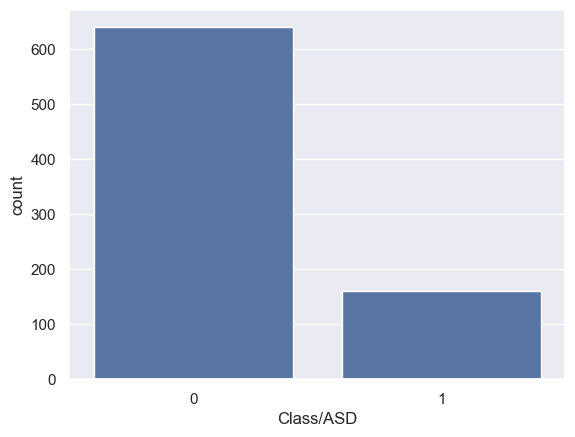

In [39]:
sns.countplot(x=data['Class/ASD'])

In [40]:
## handl emissing values
data['ethnicity'] = data['ethnicity'].replace({"?":"Others","others":"Others"})

In [43]:
data['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [45]:
data['relation']=data['relation'].replace(
      {'?' : "Others",
       'Relative':'Others',
      'Parent':'Others',
      'Health care professional':'Others'},
      
)

In [47]:
data['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [49]:
#Label encoding 
object_col = data.select_dtypes(include=['object']).columns
object_col

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [50]:
encoders ={}

for column in object_col:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    encoders[column] = label_encoder

In [52]:
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders,f)

In [53]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [54]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


In [55]:
correlation = data.corr()

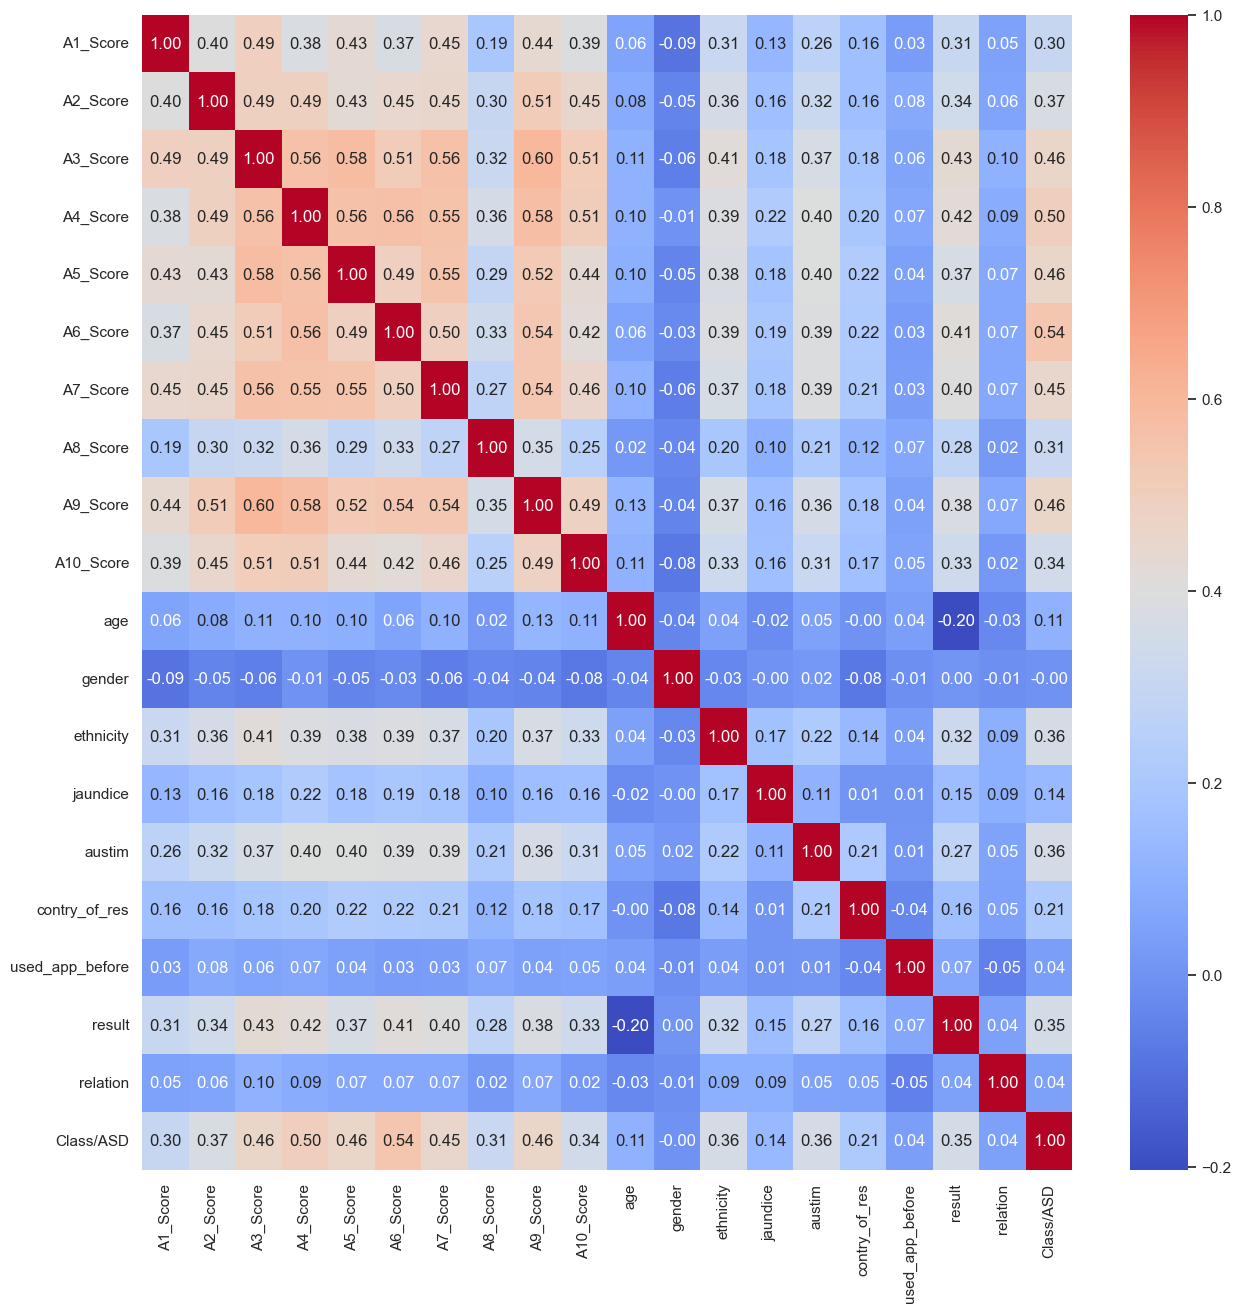

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt= '.2f')
plt.show()

In [57]:
correlation['Class/ASD'].sort_values()

gender            -0.004368
used_app_before    0.037835
relation           0.042358
age                0.109817
jaundice           0.138784
contry_of_res      0.211683
A1_Score           0.300474
A8_Score           0.312388
A10_Score          0.343736
result             0.351906
austim             0.359217
ethnicity          0.364388
A2_Score           0.372740
A7_Score           0.452338
A3_Score           0.460927
A5_Score           0.461773
A9_Score           0.463347
A4_Score           0.501046
A6_Score           0.543010
Class/ASD          1.000000
Name: Class/ASD, dtype: float64

In [59]:
## handling outliers 
def replace_outliers(df, column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    median = df[column].median()
    df[column] = df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)
    return df

In [60]:
data = replace_outliers(data, "age")
data = replace_outliers(data, "result")

In [61]:
data.shape

(800, 20)

In [63]:
X = data.drop(columns='Class/ASD')
y = data['Class/ASD']

In [64]:
X_train, X_test , y_train, y_test=  train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape, X_test.shape

((640, 19), (160, 19))

In [66]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [67]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

In [68]:
##SMOTH(Synthetic minoriyt oversampling technique)
smote = SMOTE(random_state=42)
X_train, y_train_smote = smote.fit_resample(X_train, y_train)

In [70]:
y_train_smote.value_counts()

Class/ASD
1    515
0    515
Name: count, dtype: int64

In [71]:
X_train.shape

(1030, 19)

In [74]:
# model Training
models = {
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "XGBClassifier":XGBClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier(random_state=42)
}

In [78]:
cv_scores={}

for model_name, model in models.items():
    print(f"Training {model_name} with default Parameteres...")
    scores = cross_val_score(model, X_train, y_train_smote, cv= 5, scoring='accuracy')
    cv_scores[model_name]=scores
    print(f"{model_name} CrossValidation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)
    

Training DecisionTreeClassifier with default Parameteres...
DecisionTreeClassifier CrossValidation Accuracy: 0.86
--------------------------------------------------
Training XGBClassifier with default Parameteres...
XGBClassifier CrossValidation Accuracy: 0.90
--------------------------------------------------
Training RandomForestClassifier with default Parameteres...
RandomForestClassifier CrossValidation Accuracy: 0.92
--------------------------------------------------


In [79]:
cv_scores

{'DecisionTreeClassifier': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'XGBClassifier': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573]),
 'RandomForestClassifier': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ])}

In [80]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state= 42)

In [81]:
param_grid_dt ={
    "criterion":['gini', 'entropy'],
    "max_depth":[None, 10, 20, 30, 40, 50],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf":[1, 2, 4]
}

param_grid_rf ={
    "n_estimators":[50, 100, 200, 500],
    "max_depth":[None, 10, 20, 30],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf":[1, 2, 4],
    "bootstrap":[True, False]
}

param_grid_xgb={
    "n_estimators":[50, 100, 200, 500],
    "max_depth":[3, 5, 7, 10],
    "learning_rate":[0.01, 0.1, 0.2, 0.3],
    "subsample" :[0.5, 0.7, 1.0],
    "colsample_bytree":[0.5, 0.7, 1.0]
}


In [84]:
##hyperparameter tuning
random_search_rf= RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring="accuracy", random_state=42 )
random_search_rf.fit(X_train, y_train_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [85]:
random_search_dt= RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring="accuracy", random_state=42 )
random_search_dt.fit(X_train, y_train_smote)
random_search_xgb= RandomizedSearchCV(estimator=xgboost, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring="accuracy", random_state=42 )
random_search_xgb.fit(X_train, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [88]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)
print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)
print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
0.8689320388349515
RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
0.9223300970873787
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
0.